In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import time
import allel
import numpy as np
import string
import matplotlib
import random

random.seed(42)

%matplotlib inline

df_headers = """sample,pop_id,sample_id,clus_start_chrom,clus_start_align,clust_start1,
clust_end1,sp1_qry,sp1_ref,sp2_ref,sp3_ref,sp4_ref,iden_up,ident_rep,
ident_down,ident_inv,ident_fwd,ident_epo,masked,sum_ins,sum_del,sum_mis,
sum_nuc,CpG,clus_ins,clus_del,clus_mis,fwd_score,ts_score,ts_score_maxj,ts_ref_seq_len,
ts_qry_seq_len,f1_len,f2_len,f3_len,LPR,chrom""".strip().replace("\n", "").split(",")

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

grid_grey = "#e0e0e0"
grey = "#BDBDBD"
border_width = 0.5
threshold_line_width = .75
linewidth = 6.202 # linewidth from latex document

pop_colours = {
    'AMR': '#FFB300',
    'AFR': '#E91E63',
    'SAS': '#0D47A1', 
    'EAS': '#2196F3',
    'EUR': '#673AB7',
    'ALL': 'black'
}

ts_green = "#3D8F24"
ts_purple = "#6E38CC"

sns.set_context("paper", rc={"font.size": 8,
                             "axes.labelsize": 8,
                             "xtick.labelsize": 8,
                             "ytick.labelsize": 8,
                             "legend.fontsize": 8,
                             "legend.title_fontsize": 8,
                             "axes.linewidth": border_width}) 

In [64]:
cols = ["chr", "start", "end", "DP", "MQ", "QD"]

ts_info = pd.read_csv("data/final_event_positions_info.tsv",
                      delimiter="\t",
                      header=None,
                      names=cols)
ts_info["DP"] = ts_info["DP"] / 3202

random_info = pd.read_csv("data/all_chroms_sampled.tsv",
                      delimiter="\t",
                      header=None,
                      names=cols)
random_info["DP"] = random_info["DP"] / 3202

ts_info["ID"] = ["TS"] * len(ts_info)
random_info["ID"] = ["Randomly\nsampled"] * len(random_info)

info_df = pd.concat([ts_info, random_info])

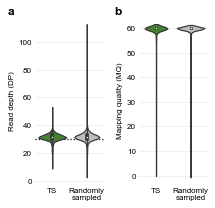

In [56]:
fig, ax = plt.subplots(1,2,figsize=(linewidth/2, linewidth/2))

palette = [ts_green, grey]

sns.violinplot(y="DP", x="ID", data=info_df, ax=ax[0],
               palette=palette)
sns.violinplot(y="MQ", x="ID", data=info_df, ax=ax[1],
               palette=palette)

x_offset = [-0.4,-0.35]

y_labs = ["Read depth (DP)", "Mapping quality (MQ)"]

for n, a in enumerate(ax):
    a.text(x_offset[n], 1.01, string.ascii_lowercase[n], transform=a.transAxes, 
            size=12, weight='bold')
    a.tick_params(axis='y', which='major', pad=-2)
    a.tick_params(axis='x', which='major', pad=-2)

    ax[n].set_xlabel("")
    ax[n].set_ylabel(y_labs[n])
    sns.despine(ax=ax[n], left=True, bottom=True)
    a.tick_params(axis="both",
                  which="both",
                  left=False, bottom=False)

for a in ax:
    a.yaxis.grid(color="#e0e0e0",
                 linewidth=border_width)
    a.set_axisbelow(True)

plt.subplots_adjust(wspace=.5)

ax[0].axhline(30, zorder=0, linestyle="dotted", color="black", label="Mean\ngenome-\nwide\nDP")

#ax[0].legend()

plt.savefig("MQ_DP_quality.pdf",
             bbox_inches="tight",
             facecolor="white",
             format="pdf")

In [68]:
scipy.stats.wilcoxon(ts_info["DP"], random_info["DP"][:len(ts_info)])

WilcoxonResult(statistic=19902802.0, pvalue=0.0006465661061118891)

In [69]:
scipy.stats.mannwhitneyu(ts_info["DP"], random_info["DP"])

MannwhitneyuResult(statistic=1007082410.5, pvalue=1.3662077454429274e-10)

In [77]:
print("Random DP: {}, TS DP: {}".format(random_info["DP"].median(), ts_info["DP"].median()))
print("Random MQ: {}, TS MQ: {}".format(random_info["MQ"].median(), ts_info["MQ"].median()))

Random DP: 31.65584009993754, TS DP: 31.48891317926296
Random MQ: 60.0, TS MQ: 60.0


In [103]:
print("DP Mann-Whitney U: {}".format(scipy.stats.mannwhitneyu(ts_info["DP"], random_info["DP"], alternative="less")))
print("MQ Mann-Whitney U: {}".format(scipy.stats.mannwhitneyu(ts_info["MQ"], random_info["MQ"], alternative="less")))

DP Mann-Whitney U: MannwhitneyuResult(statistic=1007082410.5, pvalue=1.3662077454429274e-10)
MQ Mann-Whitney U: MannwhitneyuResult(statistic=1062953576.5, pvalue=0.997626414066553)


In [93]:
random_info["DP"].median()

31.65584009993754

In [98]:
ts_info["MQ"].mean()

58.659828797190514

In [106]:
round(1.3662077454429274e-10, 10)

1e-10